<a href="https://colab.research.google.com/github/mariamloukili/Exploratory-Data-Analysis-EDA-Task4-Sparks-Foundation/blob/main/Exploratory_Data_Analysis_(EDA)_Task4_Sparks_Foundation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis - Global Terrorism**

In this section we will perform Exploratory Data Analysis on dataset ‘Terrorism’. As a security/defense analyst we have to find the hot zone of terrorism.

Steps to be followed :

1. Importing the libraries
2. Loading the dataset
3. Data Preprocessing
4. EDA
5. Data Visualization

Dataset: https://bit.ly/2TK5Xn5

#### **Author : Mariam Loukili**
## **Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading the dataset**

In [ ]:
data = pd.read_csv("globalterrorism.csv",encoding='latin1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.shape

(181691, 135)

In [ ]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

## **Data Preprocessing**
**Taking only wanted data so choosing the wanted column required for performing EDA**

In [ ]:
usecols= [1, 2, 3, 5, 8, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 64, 71, 82, 98, 100, 101, 104, 106]
renamescols = {'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill', 'nkillter':'killter',
     'nwound':'Wound'}

**Reading the dataset**

In [ ]:
df = pd.read_csv('globalterrorism.csv',encoding= 'ISO-8859-1', usecols=usecols)
df.rename(columns=renamescols, inplace =True)
print('Data read Successfully')

Data read Successfully


In [ ]:
df.head()

,Year,Month,Day,extended,Country,Region,State,City,latitude,longitude,...,Targettype,Group,motive,claimed,Weapon,kill,killter,Wound,property,propextent_txt
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,Private Citizens & Property,MANO-D,NaN,NaN,Unknown,1.0,NaN,0.0,0,NaN
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,Government (Diplomatic),23rd of September Communist League,NaN,NaN,Unknown,0.0,NaN,0.0,0,NaN
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,Journalists & Media,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,0,NaN
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,Government (Diplomatic),Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,1,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,Government (Diplomatic),Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,1,NaN


**Number of Duplicate Values in the dataset**

In [ ]:
df.duplicated().sum()

12795

**Removal of Duplicated rows**

In [ ]:
df.drop_duplicates(inplace=True)

**Checking Null Values in the dataset**

In [ ]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
extended               0
Country                0
Region                 0
State                421
City                 427
latitude            3983
longitude           3984
multiple               1
success                0
suicide                0
Attacktype             0
Targettype             0
Group                  0
motive            119932
claimed            57725
Weapon                 0
kill                9126
kilter             58516
Wound              14876
property               0
propextent_txt    110173
dtype: int64

In [ ]:
df.fillna(0, inplace =True)

In [ ]:
df.isnull().sum()

Year              0
Month             0
Day               0
extended          0
Country           0
Region            0
State             0
City              0
latitude          0
longitude         0
multiple          0
success           0
suicide           0
Attacktype        0
Targettype        0
Group             0
motive            0
claimed           0
Weapon            0
kill              0
kilter            0
Wound             0
property          0
propextent_txt    0
dtype: int64

## **Exploratory Data Analysis (EDA)**
**Checking out the number of columns with names**


In [ ]:
df.columns

Index(['Year', 'Month', 'Day', 'extended', 'Country', 'Region', 'State',
       'City', 'latitude', 'longitude', 'multiple', 'success', 'suicide',
       'Attacktype', 'Targettype', 'Group', 'motive', 'claimed', 'Weapon',
       'kill', 'kilter', 'Wound', 'property', 'propextent_txt'],
      dtype='object')

**Full Summary of Dataset**

In [ ]:
# Checking data types
df.dtypes

Year                int64
Month               int64
Day                 int64
extended            int64
Country            object
Region             object
State              object
City               object
latitude          float64
longitude         float64
multiple          float64
success             int64
suicide             int64
Attacktype         object
Targettype         object
Group              object
motive             object
claimed           float64
Weapon             object
kill              float64
kilter            float64
Wound             float64
property            int64
propextent_txt     object
dtype: object

In [ ]:
# Get informations about the data, its type and number of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168896 entries, 0 to 181690
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            168896 non-null  int64  
 1   Month           168896 non-null  int64  
 2   Day             168896 non-null  int64  
 3   extended        168896 non-null  int64  
 4   Country         168896 non-null  object 
 5   Region          168896 non-null  object 
 6   State           168896 non-null  object 
 7   City            168896 non-null  object 
 8   latitude        168896 non-null  float64
 9   longitude       168896 non-null  float64
 10  multiple        168896 non-null  float64
 11  success         168896 non-null  int64  
 12  suicide         168896 non-null  int64  
 13  Attacktype      168896 non-null  object 
 14  Targettype      168896 non-null  object 
 15  Group           168896 non-null  object 
 16  motive          168896 non-null  object 
 17  claimed   

**Statistical Summary of Data**

In [ ]:
# get description of all numerical data 
df.describe()

,Year,Month,Day,extended,latitude,longitude,multiple,success,suicide,claimed,kill,kilter,Wound,property
count,168896.000000,168896.000000,168896.000000,168896.000000,168896.000000,1.688960e+05,168896.000000,168896.000000,168896.000000,168896.000000,168896.000000,168896.00000,168896.000000,168896.000000
mean,2003.113407,6.468951,15.522120,0.047544,23.269961,-4.811530e+02,0.096699,0.888724,0.038675,0.030545,2.405001,0.34028,3.059167,-0.603922
std,13.155780,3.391523,8.813591,0.212800,18.357780,2.097136e+05,0.295548,0.314474,0.192819,0.895999,11.611824,3.46294,35.560982,3.167591
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,-9.000000,0.000000,0.00000,0.000000,-9.000000
25%,1991.000000,4.000000,8.000000,0.000000,10.286653,3.362891e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,31.250196,4.325563e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,34.526179,6.876744e+01,0.000000,1.000000,0.000000,0.000000,2.000000,0.00000,2.000000,1.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,1.000000,1570.000000,500.00000,8191.000000,1.000000


**Count number of distinct elements in each column**

In [ ]:
df.nunique()

Year                 47
Month                13
Day                  32
extended              2
Country             205
Region               12
State              2856
City              36675
latitude          48323
longitude         48040
multiple              2
success               2
suicide               2
Attacktype            9
Targettype           22
Group              3537
motive            14491
claimed               3
Weapon               12
kill                205
kilter               96
Wound               238
property              3
propextent_txt        5
dtype: int64

**Years in the Dataset**

In [ ]:
df['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

**Counting of each year in the dataset**

In [ ]:
df['Year'].value_counts()

2014    16134
2015    14258
2016    12687
2013    11624
2017    10505
2012     8270
2011     4936
2010     4699
2008     4698
2009     4660
1992     4551
1991     3969
1989     3859
1988     3360
1990     3265
2007     3171
1994     3116
1984     2967
1997     2727
2006     2724
1983     2639
1987     2557
1996     2532
1995     2481
1981     2424
1986     2395
1980     2394
1985     2383
1982     2323
1979     2308
2005     1994
2001     1867
2000     1742
1978     1419
1999     1359
2002     1300
2003     1242
1977     1195
2004     1152
1998      886
1976      859
1975      698
1970      620
1974      539
1972      492
1973      463
1971      453
Name: Year, dtype: int64

**Total Count of Region in the Dataset**

In [ ]:
df['Region'].value_counts()

Middle East & North Africa     47772
South Asia                     43071
Sub-Saharan Africa             16844
South America                  16018
Western Europe                 14741
Southeast Asia                 11906
Central America & Caribbean     8844
Eastern Europe                  4956
North America                   3236
East Asia                        687
Central Asia                     549
Australasia & Oceania            272
Name: Region, dtype: int64

**Total Count of Cities in the Dataset**

In [ ]:
df['City'].value_counts()

Unknown     8035
Baghdad     7397
Karachi     2128
Mosul       2051
Belfast     1955
            ... 
Malbase        1
Tukovi         1
Pa Ching       1
Hpa-an         1
Kubentog       1
Name: City, Length: 36675, dtype: int64

**Total Count of Attack type in the Dataset**

In [ ]:
df['Attacktype'].value_counts()

Bombing/Explosion                      80022
Armed Assault                          41051
Assassination                          18657
Hostage Taking (Kidnapping)            10873
Facility/Infrastructure Attack          8953
Unknown                                 6853
Hostage Taking (Barricade Incident)      922
Unarmed Assault                          916
Hijacking                                649
Name: Attacktype, dtype: int64

**Total Counts of Target type in Dataset**

In [ ]:
df['Targettype'].value_counts()

Private Citizens & Property       40736
Military                          27338
Police                            23641
Government (General)              20056
Business                          18095
Transportation                     6030
Unknown                            5080
Religious Figures/Institutions     4214
Educational Institution            4045
Utilities                          4036
Government (Diplomatic)            3444
Terrorists/Non-State Militia       2980
Journalists & Media                2829
Violent Political Party            1783
Airports & Aircraft                1311
NGO                                 950
Telecommunication                   891
Tourists                            427
Maritime                            339
Food or Water Supply                294
Abortion Related                    246
Other                               131
Name: Targettype, dtype: int64

**Correlation among the columns**

Correlation is used to summarize the strength and direction of the linear association between two quantitative variables.

Its values are between -1 and 1. A positive value for r indicates a positive association, and a negative value for r indicates a negative association

In [ ]:
df.corr()

,Year,Month,Day,extended,latitude,longitude,multiple,success,suicide,claimed,kill,kilter,Wound,property
Year,1.000000,-0.001473,0.018034,0.086163,0.168985,0.004051,0.163124,-0.071430,0.135268,0.074592,0.014553,0.071617,0.014842,-0.268707
Month,-0.001473,1.000000,0.005001,-0.001171,-0.012902,-0.003970,-0.002504,-0.001435,0.003077,0.019275,0.003728,0.002373,0.003022,-0.005633
Day,0.018034,0.005001,1.000000,-0.003913,0.005082,-0.002338,0.008519,-0.008821,0.002911,0.004370,-0.003852,-0.001200,-0.001211,-0.002857
extended,0.086163,-0.001171,-0.003913,1.000000,-0.034052,0.000551,-0.000329,0.075518,-0.037021,0.008065,0.012265,0.010249,-0.011058,0.002868
latitude,0.168985,-0.012902,0.005082,-0.034052,1.000000,0.001474,0.007984,-0.069646,0.071939,0.020644,-0.021064,0.014329,0.015787,-0.084681
longitude,0.004051,-0.003970,-0.002338,0.000551,0.001474,1.000000,0.000812,-0.000873,0.000505,0.000087,-0.000544,0.000247,0.000214,-0.001275
multiple,0.163124,-0.002504,0.008519,-0.000329,0.007984,0.000812,1.000000,0.012509,0.056558,0.049528,0.020571,0.029391,0.021493,-0.062137
success,-0.071430,-0.001435,-0.008821,0.075518,-0.069646,-0.000873,0.012509,1.000000,-0.031261,-0.006029,0.051272,-0.021953,0.024014,-0.041204
suicide,0.135268,0.003077,0.002911,-0.037021,0.071939,0.000505,0.056558,-0.031261,1.000000,0.038263,0.133924,0.103723,0.095276,-0.069585
claimed,0.074592,0.019275,0.004370,0.008065,0.020644,0.000087,0.049528,-0.006029,0.038263,1.000000,0.012805,0.028239,0.005395,0.037122


**Save the cleaned data into an excel file**

In [ ]:
df.to_excel('globalterrorism_final.xlsx', sheet_name='sheet1', index=False)
print("File saved successfully")

File saved successfully


# **Visualizing the Data**
In this step we will use Power BI to Visualize and interpret this data :D

Go check out the Power BI Dashboard

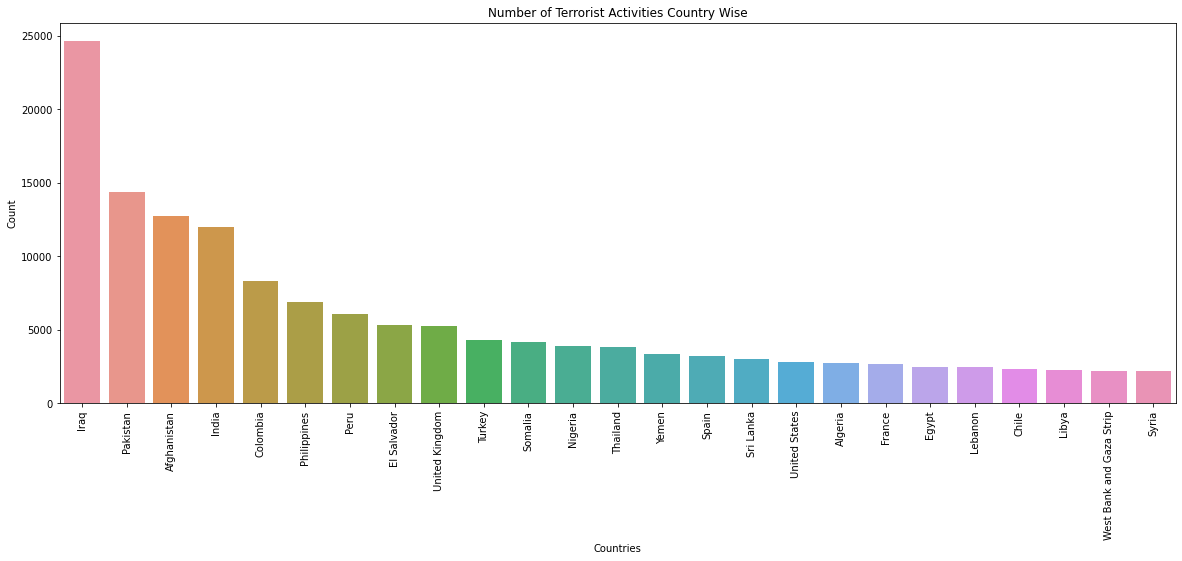

In [ ]:
plt.figure(figsize =(20,7))
sns.barplot(x=df['Country'].value_counts()[:25].index,y =df['Country'].value_counts()[:25].values)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title("Number of Terrorist Activities Country Wise")
plt.show()